In [2]:
from google.colab import files
import pandas as pd

# CSV 파일 업로드
uploaded = files.upload()

Saving NH_CONTEST_NHDATA_STK_DD_IFO.csv to NH_CONTEST_NHDATA_STK_DD_IFO.csv


In [6]:
!pip install matplotlib

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
# CSV 파일 불러오기
df = pd.read_csv('NH_CONTEST_NHDATA_STK_DD_IFO.csv')

# 데이터 정렬
df.sort_values(by=['tck_iem_cd', 'bse_dt'], inplace=True)

# 반올림 함수
def round_values(group, columns):
    for column in columns:
        group[column] = group[column].round(3)  # 셋째 자리에서 반올림
    return group

# 그룹화 및 기울기 계산
def calculate_trends(group):
    # 인덱스를 bse_dt로 설정
    group.set_index('bse_dt', inplace=True)

    # 기울기 계산 (비거래일 고려)
    group['slope_tco_avg_eal_pls_1d'] = (group['tco_avg_eal_pls'].shift(1) - group['tco_avg_eal_pls']) / 1
    group['slope_tco_avg_eal_pls_5d'] = (group['tco_avg_eal_pls'].shift(5) - group['tco_avg_eal_pls']) / 5
    group['slope_tco_avg_eal_pls_14d'] = (group['tco_avg_eal_pls'].shift(14) - group['tco_avg_eal_pls']) / 14
    group['slope_tco_avg_pft_rt_1d'] = (group['tco_avg_pft_rt'].shift(1) - group['tco_avg_pft_rt']) / 1
    group['slope_tco_avg_pft_rt_5d'] = (group['tco_avg_pft_rt'].shift(5) - group['tco_avg_pft_rt']) / 5
    group['slope_tco_avg_pft_rt_14d'] = (group['tco_avg_pft_rt'].shift(14) - group['tco_avg_pft_rt']) / 14
    group['slope_lss_ivo_rt_1d'] = (group['lss_ivo_rt'].shift(1) - group['lss_ivo_rt']) / 1
    group['slope_lss_ivo_rt_5d'] = (group['lss_ivo_rt'].shift(5) - group['lss_ivo_rt']) / 5
    group['slope_lss_ivo_rt_14d'] = (group['lss_ivo_rt'].shift(14) - group['lss_ivo_rt']) / 14
    group['slope_ifw_act_cnt_1d'] = (group['ifw_act_cnt'].shift(1) - group['ifw_act_cnt']) / 1
    group['slope_ifw_act_cnt_5d'] = (group['ifw_act_cnt'].shift(5) - group['ifw_act_cnt']) / 5
    group['slope_ifw_act_cnt_14d'] = (group['ifw_act_cnt'].shift(14) - group['ifw_act_cnt']) / 14
    group['slope_ofw_act_cnt_1d'] = (group['ofw_act_cnt'].shift(1) - group['ofw_act_cnt']) / 1
    group['slope_ofw_act_cnt_5d'] = (group['ofw_act_cnt'].shift(5) - group['ofw_act_cnt']) / 5
    group['slope_ofw_act_cnt_14d'] = (group['ofw_act_cnt'].shift(14) - group['ofw_act_cnt']) / 14
    group['slope_vw_tgt_cnt_1d'] = (group['vw_tgt_cnt'].shift(1) - group['vw_tgt_cnt']) / 1
    group['slope_vw_tgt_cnt_5d'] = (group['vw_tgt_cnt'].shift(5) - group['vw_tgt_cnt']) / 5
    group['slope_vw_tgt_cnt_14d'] = (group['vw_tgt_cnt'].shift(14) - group['vw_tgt_cnt']) / 14
    group['slope_rgs_tgt_cnt_1d'] = (group['rgs_tgt_cnt'].shift(1) - group['rgs_tgt_cnt']) / 1
    group['slope_rgs_tgt_cnt_5d'] = (group['rgs_tgt_cnt'].shift(5) - group['rgs_tgt_cnt']) / 5
    group['slope_rgs_tgt_cnt_14d'] = (group['rgs_tgt_cnt'].shift(14) - group['rgs_tgt_cnt']) / 14
    group['slope_trd_cst_1d'] = (group['trd_cst'].shift(1) - group['trd_cst']) / 1
    group['slope_trd_cst_5d'] = (group['trd_cst'].shift(5) - group['trd_cst']) / 5
    group['slope_trd_cst_14d'] = (group['trd_cst'].shift(14) - group['trd_cst']) / 14
    # NaN 값을 -9999로 대체
    # NaN 값을 -99로 대체
    group[['slope_tco_avg_eal_pls_1d', 'slope_tco_avg_eal_pls_5d', 'slope_tco_avg_eal_pls_14d']] = group[['slope_tco_avg_eal_pls_1d', 'slope_tco_avg_eal_pls_5d', 'slope_tco_avg_eal_pls_14d']].fillna(-99)
    group[['slope_tco_avg_pft_rt_1d', 'slope_tco_avg_pft_rt_5d', 'slope_tco_avg_pft_rt_14d']] = group[['slope_tco_avg_pft_rt_1d', 'slope_tco_avg_pft_rt_5d', 'slope_tco_avg_pft_rt_14d']].fillna(-99)
    group[['slope_lss_ivo_rt_1d', 'slope_lss_ivo_rt_5d', 'slope_lss_ivo_rt_14d']] = group[['slope_lss_ivo_rt_1d', 'slope_lss_ivo_rt_5d', 'slope_lss_ivo_rt_14d']].fillna(-99)
    group[['slope_ifw_act_cnt_1d', 'slope_ifw_act_cnt_5d', 'slope_ifw_act_cnt_14d']] = group[['slope_ifw_act_cnt_1d', 'slope_ifw_act_cnt_5d', 'slope_ifw_act_cnt_14d']].fillna(-99)
    group[['slope_ofw_act_cnt_1d', 'slope_ofw_act_cnt_5d', 'slope_ofw_act_cnt_14d']] = group[['slope_ofw_act_cnt_1d', 'slope_ofw_act_cnt_5d', 'slope_ofw_act_cnt_14d']].fillna(-99)
    group[['slope_vw_tgt_cnt_1d', 'slope_vw_tgt_cnt_5d', 'slope_vw_tgt_cnt_14d']] = group[['slope_vw_tgt_cnt_1d', 'slope_vw_tgt_cnt_5d', 'slope_vw_tgt_cnt_14d']].fillna(-99)
    group[['slope_rgs_tgt_cnt_1d', 'slope_rgs_tgt_cnt_5d', 'slope_rgs_tgt_cnt_14d']] = group[['slope_rgs_tgt_cnt_1d', 'slope_rgs_tgt_cnt_5d', 'slope_rgs_tgt_cnt_14d']].fillna(-99)
    group[['slope_trd_cst_1d', 'slope_trd_cst_5d', 'slope_trd_cst_14d']] = group[['slope_trd_cst_1d', 'slope_trd_cst_5d', 'slope_trd_cst_14d']].fillna(-99)

    # 미래 기울기 계산
    group['future_slope_tco_avg_eal_pls_1d'] = (group['tco_avg_eal_pls'].shift(-1) - group['tco_avg_eal_pls']) / 1
    group['future_slope_tco_avg_eal_pls_5d'] = (group['tco_avg_eal_pls'].shift(-5) - group['tco_avg_eal_pls']) / 5
    group['future_slope_tco_avg_eal_pls_14d'] = (group['tco_avg_eal_pls'].shift(-14) - group['tco_avg_eal_pls']) / 14
    group['future_slope_tco_avg_pft_rt_1d'] = (group['tco_avg_pft_rt'].shift(-1) - group['tco_avg_pft_rt']) / 1
    group['future_slope_tco_avg_pft_rt_5d'] = (group['tco_avg_pft_rt'].shift(-5) - group['tco_avg_pft_rt']) / 5
    group['future_slope_tco_avg_pft_rt_14d'] = (group['tco_avg_pft_rt'].shift(-14) - group['tco_avg_pft_rt']) / 14
    group['future_slope_lss_ivo_rt_1d'] = (group['lss_ivo_rt'].shift(-1) - group['lss_ivo_rt']) / 1
    group['future_slope_lss_ivo_rt_5d'] = (group['lss_ivo_rt'].shift(-5) - group['lss_ivo_rt']) / 5
    group['future_slope_lss_ivo_rt_14d'] = (group['lss_ivo_rt'].shift(-14) - group['lss_ivo_rt']) / 14
    group['future_slope_ifw_act_cnt_1d'] = (group['ifw_act_cnt'].shift(-1) - group['ifw_act_cnt']) / 1
    group['future_slope_ifw_act_cnt_5d'] = (group['ifw_act_cnt'].shift(-5) - group['ifw_act_cnt']) / 5
    group['future_slope_ifw_act_cnt_14d'] = (group['ifw_act_cnt'].shift(-14) - group['ifw_act_cnt']) / 14
    group['future_slope_ofw_act_cnt_1d'] = (group['ofw_act_cnt'].shift(-1) - group['ofw_act_cnt']) / 1
    group['future_slope_ofw_act_cnt_5d'] = (group['ofw_act_cnt'].shift(-5) - group['ofw_act_cnt']) / 5
    group['future_slope_ofw_act_cnt_14d'] = (group['ofw_act_cnt'].shift(-14) - group['ofw_act_cnt']) / 14
    group['future_slope_vw_tgt_cnt_1d'] = (group['vw_tgt_cnt'].shift(-1) - group['vw_tgt_cnt']) / 1
    group['future_slope_vw_tgt_cnt_5d'] = (group['vw_tgt_cnt'].shift(-5) - group['vw_tgt_cnt']) / 5
    group['future_slope_vw_tgt_cnt_14d'] = (group['vw_tgt_cnt'].shift(-14) - group['vw_tgt_cnt']) / 14
    group['future_slope_rgs_tgt_cnt_1d'] = (group['rgs_tgt_cnt'].shift(-1) - group['rgs_tgt_cnt']) / 1
    group['future_slope_rgs_tgt_cnt_5d'] = (group['rgs_tgt_cnt'].shift(-5) - group['rgs_tgt_cnt']) / 5
    group['future_slope_rgs_tgt_cnt_14d'] = (group['rgs_tgt_cnt'].shift(-14) - group['rgs_tgt_cnt']) / 14
    group['future_slope_trd_cst_1d'] = (group['trd_cst'].shift(-1) - group['trd_cst']) / 1
    group['future_slope_trd_cst_5d'] = (group['trd_cst'].shift(-5) - group['trd_cst']) / 5
    group['future_slope_trd_cst_14d'] = (group['trd_cst'].shift(-14) - group['trd_cst']) / 14
    # 미래 슬로프 관련 NaN 값을 -99로 대체
    group[['future_slope_tco_avg_eal_pls_1d', 'future_slope_tco_avg_eal_pls_5d', 'future_slope_tco_avg_eal_pls_14d']] = group[['future_slope_tco_avg_eal_pls_1d', 'future_slope_tco_avg_eal_pls_5d', 'future_slope_tco_avg_eal_pls_14d']].fillna(-99)
    group[['future_slope_tco_avg_pft_rt_1d', 'future_slope_tco_avg_pft_rt_5d', 'future_slope_tco_avg_pft_rt_14d']] = group[['future_slope_tco_avg_pft_rt_1d', 'future_slope_tco_avg_pft_rt_5d', 'future_slope_tco_avg_pft_rt_14d']].fillna(-99)
    group[['future_slope_lss_ivo_rt_1d', 'future_slope_lss_ivo_rt_5d', 'future_slope_lss_ivo_rt_14d']] = group[['future_slope_lss_ivo_rt_1d', 'future_slope_lss_ivo_rt_5d', 'future_slope_lss_ivo_rt_14d']].fillna(-99)
    group[['future_slope_ifw_act_cnt_1d', 'future_slope_ifw_act_cnt_5d', 'future_slope_ifw_act_cnt_14d']] = group[['future_slope_ifw_act_cnt_1d', 'future_slope_ifw_act_cnt_5d', 'future_slope_ifw_act_cnt_14d']].fillna(-99)
    group[['future_slope_ofw_act_cnt_1d', 'future_slope_ofw_act_cnt_5d', 'future_slope_ofw_act_cnt_14d']] = group[['future_slope_ofw_act_cnt_1d', 'future_slope_ofw_act_cnt_5d', 'future_slope_ofw_act_cnt_14d']].fillna(-99)
    group[['future_slope_vw_tgt_cnt_1d', 'future_slope_vw_tgt_cnt_5d', 'future_slope_vw_tgt_cnt_14d']] = group[['future_slope_vw_tgt_cnt_1d', 'future_slope_vw_tgt_cnt_5d', 'future_slope_vw_tgt_cnt_14d']].fillna(-99)
    group[['future_slope_rgs_tgt_cnt_1d', 'future_slope_rgs_tgt_cnt_5d', 'future_slope_rgs_tgt_cnt_14d']] = group[['future_slope_rgs_tgt_cnt_1d', 'future_slope_rgs_tgt_cnt_5d', 'future_slope_rgs_tgt_cnt_14d']].fillna(-99)
    group[['future_slope_trd_cst_1d', 'future_slope_trd_cst_5d', 'future_slope_trd_cst_14d']] = group[['future_slope_trd_cst_1d', 'future_slope_trd_cst_5d', 'future_slope_trd_cst_14d']].fillna(-99)
  # 기울기 값에 따른 해석 추가
#    def interpret_trend(slope_past, slope_future):
#        if slope_past == -9999 or slope_future == -9999:
#            return "impossible"  # -9999이 있을 경우
#        elif slope_past > 0 and slope_future > 0:
#            return 1  # 꾸준히 증가
#       elif slope_past < 0 and slope_future < 0:
#            return -1  # 꾸준히 감소
#        else:
#            return 0  # 반전

    # 1일, 7일, 30일 전후 기울기 해석 추가
 #   group['trend_1d'] = group.apply(lambda x: interpret_trend(x['slope_1d'], x['future_slope_1d']), axis=1)
#  group['trend_7d'] = group.apply(lambda x: interpret_trend(x['slope_7d'], x['future_slope_7d']), axis=1)
 #   group['trend_30d'] = group.apply(lambda x: interpret_trend(x['slope_30d'], x['future_slope_30d']), axis=1)

    return group.reset_index()  # 인덱스 초기화 및 bse_dt 컬럼 유지

# 그룹화 적용
result = df.groupby('tck_iem_cd').apply(calculate_trends).reset_index(drop=True)

# 필요한 컬럼만 선택
final_result = result[['tck_iem_cd', 'bse_dt',
    'slope_tco_avg_eal_pls_1d', 'slope_tco_avg_eal_pls_5d', 'slope_tco_avg_eal_pls_14d',
    'future_slope_tco_avg_eal_pls_1d', 'future_slope_tco_avg_eal_pls_5d', 'future_slope_tco_avg_eal_pls_14d',
    'slope_tco_avg_pft_rt_1d', 'slope_tco_avg_pft_rt_5d', 'slope_tco_avg_pft_rt_14d',
    'future_slope_tco_avg_pft_rt_1d', 'future_slope_tco_avg_pft_rt_5d', 'future_slope_tco_avg_pft_rt_14d',
    'slope_lss_ivo_rt_1d', 'slope_lss_ivo_rt_5d', 'slope_lss_ivo_rt_14d',
    'future_slope_lss_ivo_rt_1d', 'future_slope_lss_ivo_rt_5d', 'future_slope_lss_ivo_rt_14d',
    'slope_ifw_act_cnt_1d', 'slope_ifw_act_cnt_5d', 'slope_ifw_act_cnt_14d',
    'future_slope_ifw_act_cnt_1d', 'future_slope_ifw_act_cnt_5d', 'future_slope_ifw_act_cnt_14d',
    'slope_ofw_act_cnt_1d', 'slope_ofw_act_cnt_5d', 'slope_ofw_act_cnt_14d',
    'future_slope_ofw_act_cnt_1d', 'future_slope_ofw_act_cnt_5d', 'future_slope_ofw_act_cnt_14d',
    'slope_vw_tgt_cnt_1d', 'slope_vw_tgt_cnt_5d', 'slope_vw_tgt_cnt_14d',
    'future_slope_vw_tgt_cnt_1d', 'future_slope_vw_tgt_cnt_5d', 'future_slope_vw_tgt_cnt_14d',
    'slope_rgs_tgt_cnt_1d', 'slope_rgs_tgt_cnt_5d', 'slope_rgs_tgt_cnt_14d',
    'future_slope_rgs_tgt_cnt_1d', 'future_slope_rgs_tgt_cnt_5d', 'future_slope_rgs_tgt_cnt_14d',
    'slope_trd_cst_1d', 'slope_trd_cst_5d', 'slope_trd_cst_14d',
    'future_slope_trd_cst_1d', 'future_slope_trd_cst_5d', 'future_slope_trd_cst_14d'
]]
# 'trend_1d', 'trend_7d', 'trend_30d'

# 정규화 함수
def min_max_normalize(df, columns):
    normalized_df = df.copy()
    for column in columns:
        # -9999999999 값을 제외한 최소값과 최대값 계산
        filtered_column = normalized_df[column][normalized_df[column] != -9999999999]

        # NaN이나 빈 열에 대한 처리를 위해 조건 추가
        if not filtered_column.empty:
            min_val = filtered_column.min()
            max_val = filtered_column.max()

            # 정규화 수행
            normalized_df[column] = normalized_df[column].apply(
                lambda x: (x - min_val) / (max_val - min_val) if max_val != min_val and x != -9999999999 else x
            )
        else:
            normalized_df[column] = normalized_df[column].replace(-9999999999, -9999999999)  # 예외 처리 유지

    return normalized_df

# 정규화할 열 리스트
columns_to_normalize = [
    'slope_tco_avg_eal_pls_1d', 'slope_tco_avg_eal_pls_5d', 'slope_tco_avg_eal_pls_14d',
    'future_slope_tco_avg_eal_pls_1d', 'future_slope_tco_avg_eal_pls_5d', 'future_slope_tco_avg_eal_pls_14d',
    'slope_tco_avg_pft_rt_1d', 'slope_tco_avg_pft_rt_5d', 'slope_tco_avg_pft_rt_14d',
    'future_slope_tco_avg_pft_rt_1d', 'future_slope_tco_avg_pft_rt_5d', 'future_slope_tco_avg_pft_rt_14d',
    'slope_lss_ivo_rt_1d', 'slope_lss_ivo_rt_5d', 'slope_lss_ivo_rt_14d',
    'future_slope_lss_ivo_rt_1d', 'future_slope_lss_ivo_rt_5d', 'future_slope_lss_ivo_rt_14d',
    'slope_ifw_act_cnt_1d', 'slope_ifw_act_cnt_5d', 'slope_ifw_act_cnt_14d',
    'future_slope_ifw_act_cnt_1d', 'future_slope_ifw_act_cnt_5d', 'future_slope_ifw_act_cnt_14d',
    'slope_ofw_act_cnt_1d', 'slope_ofw_act_cnt_5d', 'slope_ofw_act_cnt_14d',
    'future_slope_ofw_act_cnt_1d', 'future_slope_ofw_act_cnt_5d', 'future_slope_ofw_act_cnt_14d',
    'slope_vw_tgt_cnt_1d', 'slope_vw_tgt_cnt_5d', 'slope_vw_tgt_cnt_14d',
    'future_slope_vw_tgt_cnt_1d', 'future_slope_vw_tgt_cnt_5d', 'future_slope_vw_tgt_cnt_14d',
    'slope_rgs_tgt_cnt_1d', 'slope_rgs_tgt_cnt_5d', 'slope_rgs_tgt_cnt_14d',
    'future_slope_rgs_tgt_cnt_1d', 'future_slope_rgs_tgt_cnt_5d', 'future_slope_rgs_tgt_cnt_14d',
    'slope_trd_cst_1d', 'slope_trd_cst_5d', 'slope_trd_cst_14d',
    'future_slope_trd_cst_1d', 'future_slope_trd_cst_5d', 'future_slope_trd_cst_14d'
]

# 정규화 수행
final_result_normalized = min_max_normalize(final_result, columns_to_normalize)

# CSV 파일로 저장
output_file = 'slopes_about_normalized.csv'  # 정규화된 결과 파일 이름
final_result_normalized.to_csv(output_file, index=False)

# 파일 다운로드
files.download(output_file)  # 파일 다운로드 기능은 환경에 따라 다를 수 있습니다.
print("정규화된 CSV 파일로 저장되었습니다.")



<ipython-input-30-f47bb1969f9a>:62: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby('tck_iem_cd').apply(calculate_trends).reset_index(drop=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

정규화된 CSV 파일로 저장되었습니다.


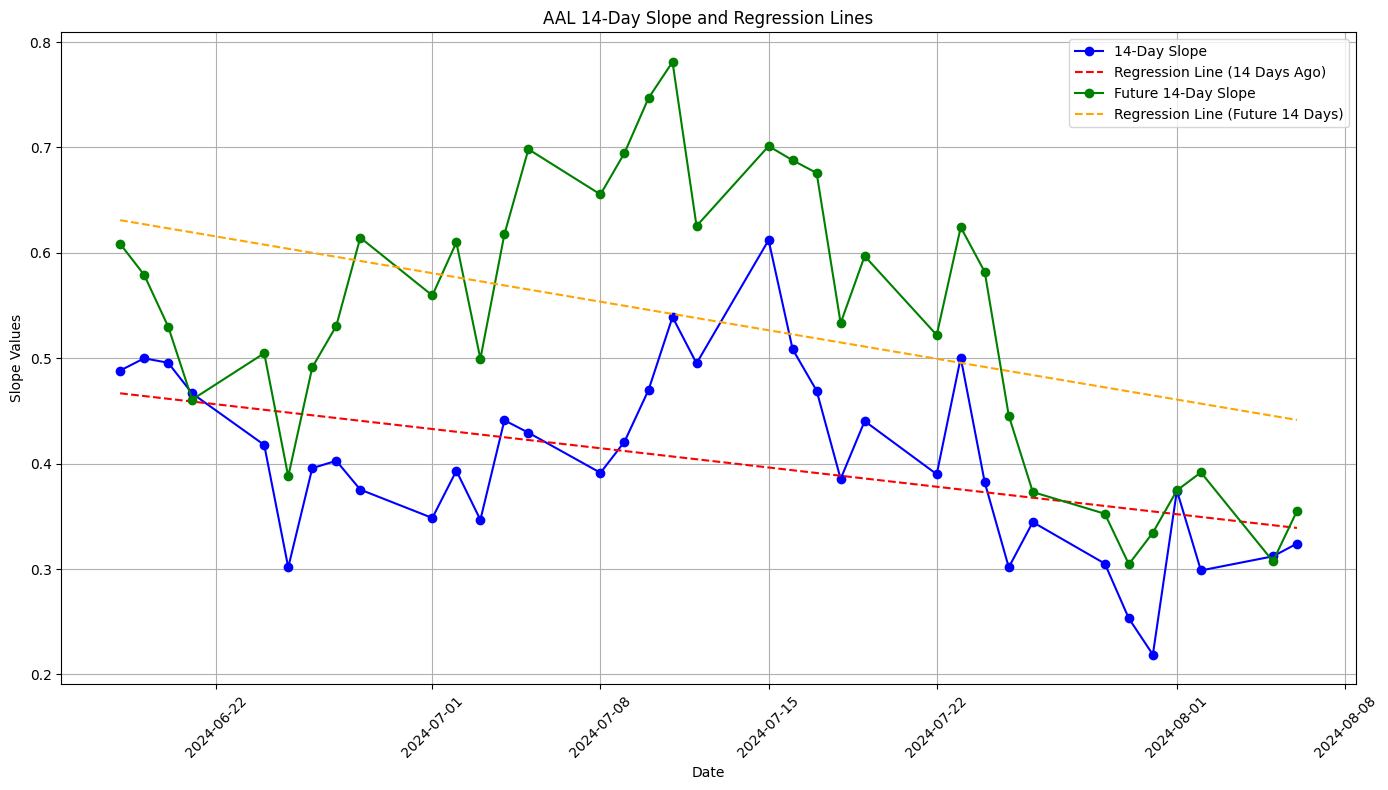

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# AAL 데이터 필터링
aapl_data = final_result_normalized[final_result_normalized['tck_iem_cd'] == 'NVDA        '].copy()

# bse_dt를 날짜 형식으로 변환
aapl_data['bse_dt'] = pd.to_datetime(aapl_data['bse_dt'].astype(str), format='%Y%m%d', errors='coerce')

# 예외값 제외
aapl_data_filtered = aapl_data[
    (aapl_data['slope_lss_ivo_rt_14d'] != -9999999999) &
    (aapl_data['future_slope_lss_ivo_rt_14d'] != -9999999999)
].copy()

# 날짜를 숫자로 변환 (모델에 입력하기 위해)
aapl_data_filtered['date_ordinal'] = aapl_data_filtered['bse_dt'].map(pd.Timestamp.toordinal)

# 회귀 분석을 위한 데이터 준비
# 14일 전 기울기에 대한 회귀 분석
X1 = aapl_data_filtered[['date_ordinal']]
y1 = aapl_data_filtered['slope_lss_ivo_rt_14d']

model1 = LinearRegression()
model1.fit(X1, y1)

# 회귀선 계산
aapl_data_filtered['regression_line_14d'] = model1.predict(X1)

# 14일 후 기울기에 대한 회귀 분석
X2 = aapl_data_filtered[['date_ordinal']]
y2 = aapl_data_filtered['future_slope_lss_ivo_rt_14d']

model2 = LinearRegression()
model2.fit(X2, y2)

# 회귀선 계산
aapl_data_filtered['regression_line_future'] = model2.predict(X2)

# Plotting
plt.figure(figsize=(14, 8))

# 14일 전 기울기 플롯
plt.plot(aapl_data_filtered['bse_dt'], aapl_data_filtered['slope_lss_ivo_rt_14d'],
         label='14-Day Slope', color='blue', marker='o')

# 14일 전 기울기에 대한 회귀선 플롯
plt.plot(aapl_data_filtered['bse_dt'], aapl_data_filtered['regression_line_14d'],
         label='Regression Line (14 Days Ago)', color='red', linestyle='--')

# 14일 후 기울기 플롯
plt.plot(aapl_data_filtered['bse_dt'], aapl_data_filtered['future_slope_lss_ivo_rt_14d'],
         label='Future 14-Day Slope', color='green', marker='o')

# 14일 후 기울기에 대한 회귀선 플롯
plt.plot(aapl_data_filtered['bse_dt'], aapl_data_filtered['regression_line_future'],
         label='Regression Line (Future 14 Days)', color='orange', linestyle='--')

# 그래프 설정
plt.title('AAL 14-Day Slope and Regression Lines')
plt.xlabel('Date')
plt.ylabel('Slope Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [92]:
from google.colab import files
import pandas as pd

# CSV 파일 업로드
uploaded = files.upload()
# 업로드된 파일을 데이터프레임으로 읽기
file_names = list(uploaded.keys())
df1 = pd.read_csv(file_names[0])
df2 = pd.read_csv(file_names[1])

# 두 데이터프레임의 공통 bse_dt와 tck_iem_cd 찾기
common_keys = pd.merge(df1[['bse_dt', 'tck_iem_cd']], df2[['bse_dt', 'tck_iem_cd']], on=['bse_dt', 'tck_iem_cd'])

# 공통 키를 가진 행 필터링
filtered_df1 = df1[df1.set_index(['bse_dt', 'tck_iem_cd']).index.isin(common_keys.set_index(['bse_dt', 'tck_iem_cd']).index)]
filtered_df2 = df2[df2.set_index(['bse_dt', 'tck_iem_cd']).index.isin(common_keys.set_index(['bse_dt', 'tck_iem_cd']).index)]

# 공통 컬럼 찾기
common_cols = list(set(filtered_df1.columns) & set(filtered_df2.columns))

# 공통 컬럼을 포함하여 두 데이터프레임을 merge
merged_df = pd.merge(filtered_df1, filtered_df2, on=['bse_dt', 'tck_iem_cd'], suffixes=('_df1', '_df2'))

# 결과 출력
print("Merged DataFrame:")
print(merged_df)

# 결과를 CSV로 저장
merged_df.to_csv('merged_result.csv', index=False)


Saving last_day_natr_sorted_by_natr.csv to last_day_natr_sorted_by_natr.csv
Saving merged_result.csv to merged_result (1).csv
Merged DataFrame:
        bse_dt    tck_iem_cd  iem_hi_pr_df1  iem_low_pr_df1  iem_end_pr_df1  \
0     20240826  SOF                100.6299        100.6000        100.6200   
1     20240826  HCP                 33.8900         33.7400         33.8000   
2     20240826  PFF                 32.4800         32.3000         32.3400   
3     20240826  AOR                 58.3559         58.0605         58.1600   
4     20240826  XYLD                41.2000         41.0400         41.0900   
...        ...           ...            ...             ...             ...   
1271  20240826  ASTS                34.3100         30.7400         33.7800   
1272  20240826  SPCE                 7.3550          6.9700          7.0500   
1273  20240826  LUMN                 6.3300          5.9100          6.1200   
1274  20240826  MAXN                 0.2008          0.1599       

In [93]:
# 파일 다운로드
files.download('merged_result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>